# EDA of Taxi Trip Pricing dataset from Kaggle
This dataset is designed to predict taxi trip fares based on various factors such as distance, time of day, traffic conditions, and more. It provides realistic synthetic data for regression tasks, offering a unique opportunity to explore pricing trends in the taxi industry.

Source: https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction

## 1. Loading the dataset + columns and data types

In [67]:
import pandas as pd
from taxipred.utils.constants import TAXI_CSV_PATH

df = pd.read_csv(TAXI_CSV_PATH)

### Dataset Preview

In [68]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


### Info (columns)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


### Describe

In [70]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


___

## 2. Additional EDA - unique values, outliers, correlations

### A. Check unique values and their frequencies:

In [71]:
for col in ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']:
    print(f"\n{col}:")
    print(df[col].value_counts())


Time_of_Day:
Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

Day_of_Week:
Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64

Traffic_Conditions:
Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64

Weather:
Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64


**Conclusion**: Looks normal/reasonable for taxi trips, so the data quality looks fine!

### B. See if missing values appear together in specific rows

In [72]:
df.isnull().sum(axis=1).value_counts() # Nulls per row

0    562
1    341
2     83
3     14
Name: count, dtype: int64

**Conclusion**: Most data complete - missing values aren't concentrated to a few "bad" lines but rather spread out = easier to clean.

### C. Box plots for key numerical features

<Axes: >

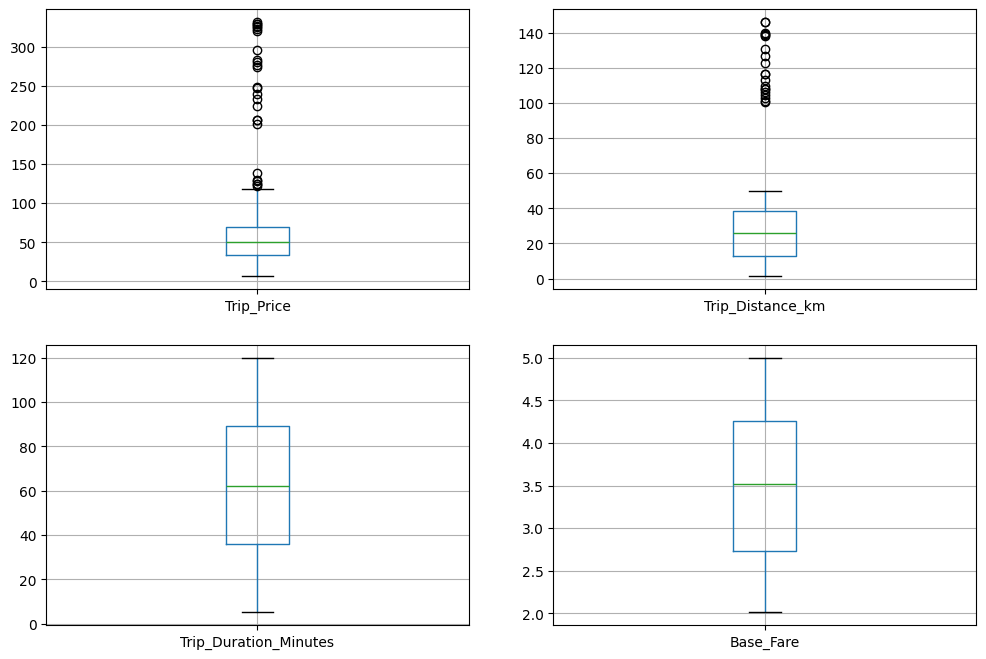

In [73]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
df.boxplot(column='Trip_Price', ax=axes[0,0])
df.boxplot(column='Trip_Distance_km', ax=axes[0,1])
df.boxplot(column='Trip_Duration_Minutes', ax=axes[1,0])
df.boxplot(column='Base_Fare', ax=axes[1,1])

**Conclusion**:
- `Trip_Price` has many outliers above ~$150 = prices higher than expected by statistical distribution.
- `Trip_Distance` has many outliers above ~80 km = longer trips than typical distribution.
- `Trip_Duration_Minutes` looks balanced apart from the 120 min one.
- `Base_Fare` indicates constistent base pricing.

### D. Quick correlation check

In [74]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].corr()['Trip_Price'].sort_values(ascending=False)

Trip_Price               1.000000
Trip_Distance_km         0.849123
Per_Km_Rate              0.275135
Trip_Duration_Minutes    0.221211
Per_Minute_Rate          0.141226
Base_Fare                0.035533
Passenger_Count         -0.014223
Name: Trip_Price, dtype: float64

**Conclusion**:
- `Trip_Distance_Km` is my strongest predictor.
- `Per_Km_Rate` has a moderate correlation and might be useful. 
- `Trip_Duration_Minutes` is weak but might be useful.

### E. Look for "impossible" values

In [75]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Negative values check:")
print((df[numerical_cols] < 0).sum())

print("\nZero values in distance/duration:")
print(f"Zero distance: {(df['Trip_Distance_km'] == 0).sum()}")
print(f"Zero duration: {(df['Trip_Duration_Minutes'] == 0).sum()}")

Negative values check:
Trip_Distance_km         0
Passenger_Count          0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

Zero values in distance/duration:
Zero distance: 0
Zero duration: 0


**Conclusion**: 
- No negative values
- No zero distances/durations ("impossible" trips)

___

### 3. Data cleaning

**Plan**:
- I will keep most outliers since they represent actual taxi scenarios - but instead I will focus on impossible or illogical values.
- I will drop the lines with 2+ null values, but keep the lines with 1 null value - and try to fill out these values somehow (?). 

In [76]:
# Actual extremes values (price/distance)
print("Highest prices:")
print(df.nlargest(5, 'Trip_Price')[['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price']])

print("\nLongest distances:")  
print(df.nlargest(5, 'Trip_Distance_km')[['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price']])

Highest prices:
     Trip_Distance_km  Trip_Duration_Minutes  Trip_Price
616        138.763887                  74.32  332.043689
287        100.380420                  89.21  329.913004
225        130.809001                  88.31  328.871769
141        109.616082                  53.88  327.217665
302        145.747060                  60.29  325.098950

Longest distances:
     Trip_Distance_km  Trip_Duration_Minutes  Trip_Price
64         146.067047                  60.81  320.958664
302        145.747060                  60.29  325.098950
532        139.476515                  46.85  296.088697
268        139.062230                  50.83  276.840597
616        138.763887                  74.32  332.043689


In [77]:
# Dropping lines conditionally
df_clean = df[
    (df['Trip_Price'] > 0) &  # No free rides
    (df['Trip_Distance_km'] > 0) &  # No zero-distance trips
    (df['Trip_Duration_Minutes'] > 0)  # No instant trips
].copy()

In [78]:
# Check how many nulls per row in cleaned data
null_counts_per_row = df_clean.isnull().sum(axis=1)
print("Null values per row:")
print(null_counts_per_row.value_counts().sort_index())

# See which rows have 2+ nulls
rows_with_2plus_nulls = df_clean[null_counts_per_row >= 2]
print(f"\nRows with 2+ nulls: {len(rows_with_2plus_nulls)}")
print("Preview of problematic rows:")
print(rows_with_2plus_nulls.head())

Null values per row:
0    562
1    253
2     40
3      3
Name: count, dtype: int64

Rows with 2+ nulls: 43
Preview of problematic rows:
    Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
13             11.40     Morning     Weekday              3.0   
25             39.47   Afternoon     Weekday              1.0   
43             45.56   Afternoon     Weekday              NaN   
56              5.34         NaN     Weekday              2.0   
60             20.05     Evening         NaN              2.0   

   Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
13                NaN   Clear       4.12          NaN             0.15   
25                Low   Clear        NaN          NaN             0.35   
43                Low   Clear        NaN         0.90             0.50   
56                Low   Clear       2.34          NaN             0.18   
60                Low     NaN       3.02         0.86             0.39   

    Trip_Duration_Minutes  T

In [79]:
# Remove rows with 2+ nulls
null_counts_per_row = df_clean.isnull().sum(axis=1)
df_clean_drop_nulls = df_clean[null_counts_per_row <= 1].copy()

print(f"Before: {len(df_clean)} rows")
print(f"After removing 2+ nulls: {len(df_clean_drop_nulls)} rows")
print(f"Removed: {len(df_clean) - len(df_clean_drop_nulls)} rows")

Before: 858 rows
After removing 2+ nulls: 815 rows
Removed: 43 rows


In [80]:
# Check remaining nulls
print("\nRemaining null counts:")
print(df_clean_drop_nulls.isnull().sum())


Remaining null counts:
Trip_Distance_km          0
Time_of_Day              39
Day_of_Week              26
Passenger_Count          28
Traffic_Conditions       35
Weather                  30
Base_Fare                31
Per_Km_Rate              30
Per_Minute_Rate          34
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64


In [81]:
# Fill categorical columns with mode
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'] # Text-based columns to fill with most common values

# Loop through the above columns
for col in categorical_cols:
    if df_clean_drop_nulls[col].isnull().any():
        mode_value = df_clean_drop_nulls[col].mode()[0] # Find the most frequent value, and return the first one with 'mode()[0]'
        df_clean_drop_nulls[col] = df_clean_drop_nulls[col].fillna(mode_value) # Replace all null values in current column with 'mode_value'
        print(f"Filled {col} nulls with: {mode_value}")

Filled Time_of_Day nulls with: Afternoon
Filled Day_of_Week nulls with: Weekday
Filled Traffic_Conditions nulls with: Low
Filled Weather nulls with: Clear


In [82]:
# Fill numerical columns with median value
numerical_cols = ['Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate'] # Numerical columns to fill with median

# Loop through the above columns
for col in numerical_cols:
    if df_clean_drop_nulls[col].isnull().any():
        median_value = df_clean_drop_nulls[col].median() # Calculates the median - better than mean due to the high outliers
        df_clean_drop_nulls[col] = df_clean_drop_nulls[col].fillna(median_value) # Replace all null values in current column with 'median_value'
        print(f"Filled {col} nulls with median: {median_value:.2f}")

Filled Passenger_Count nulls with median: 2.00
Filled Base_Fare nulls with median: 3.54
Filled Per_Km_Rate nulls with median: 1.21
Filled Per_Minute_Rate nulls with median: 0.29


In [83]:
# Verify the cleaning
print(f"Final shape: {df_clean_drop_nulls.shape}")
print(f"Total nulls remaining: {df_clean_drop_nulls.isnull().sum().sum()}")

if df_clean_drop_nulls.isnull().sum().sum() == 0:
    print("SUCCESS: Dataset was successfully cleaned!")
else:
    print("WARNING: Nulls are still present in the dataset!")
    print(df_clean_drop_nulls.isnull().sum())

Final shape: (815, 11)
Total nulls remaining: 0
SUCCESS: Dataset was successfully cleaned!


In [84]:
# Convert all column names to lowercase
df_clean_drop_nulls.columns = df_clean_drop_nulls.columns.str.lower()

# Print result to verify changes
print("New column names:")
print(df_clean_drop_nulls.columns.tolist())

New column names:
['trip_distance_km', 'time_of_day', 'day_of_week', 'passenger_count', 'traffic_conditions', 'weather', 'base_fare', 'per_km_rate', 'per_minute_rate', 'trip_duration_minutes', 'trip_price']


In [85]:
# Saving the cleaned dataframe
from pathlib import Path

# Enter taxipred data-folder and save the file
clean_csv_path = Path("../src/taxipred/data/taxi_trip_pricing_clean.csv")
df_clean_drop_nulls.to_csv(clean_csv_path, index=False)

print(f"Saved to: {clean_csv_path}")

Saved to: ..\src\taxipred\data\taxi_trip_pricing_clean.csv


### Additional EDA (on cleaned .csv), during round 3

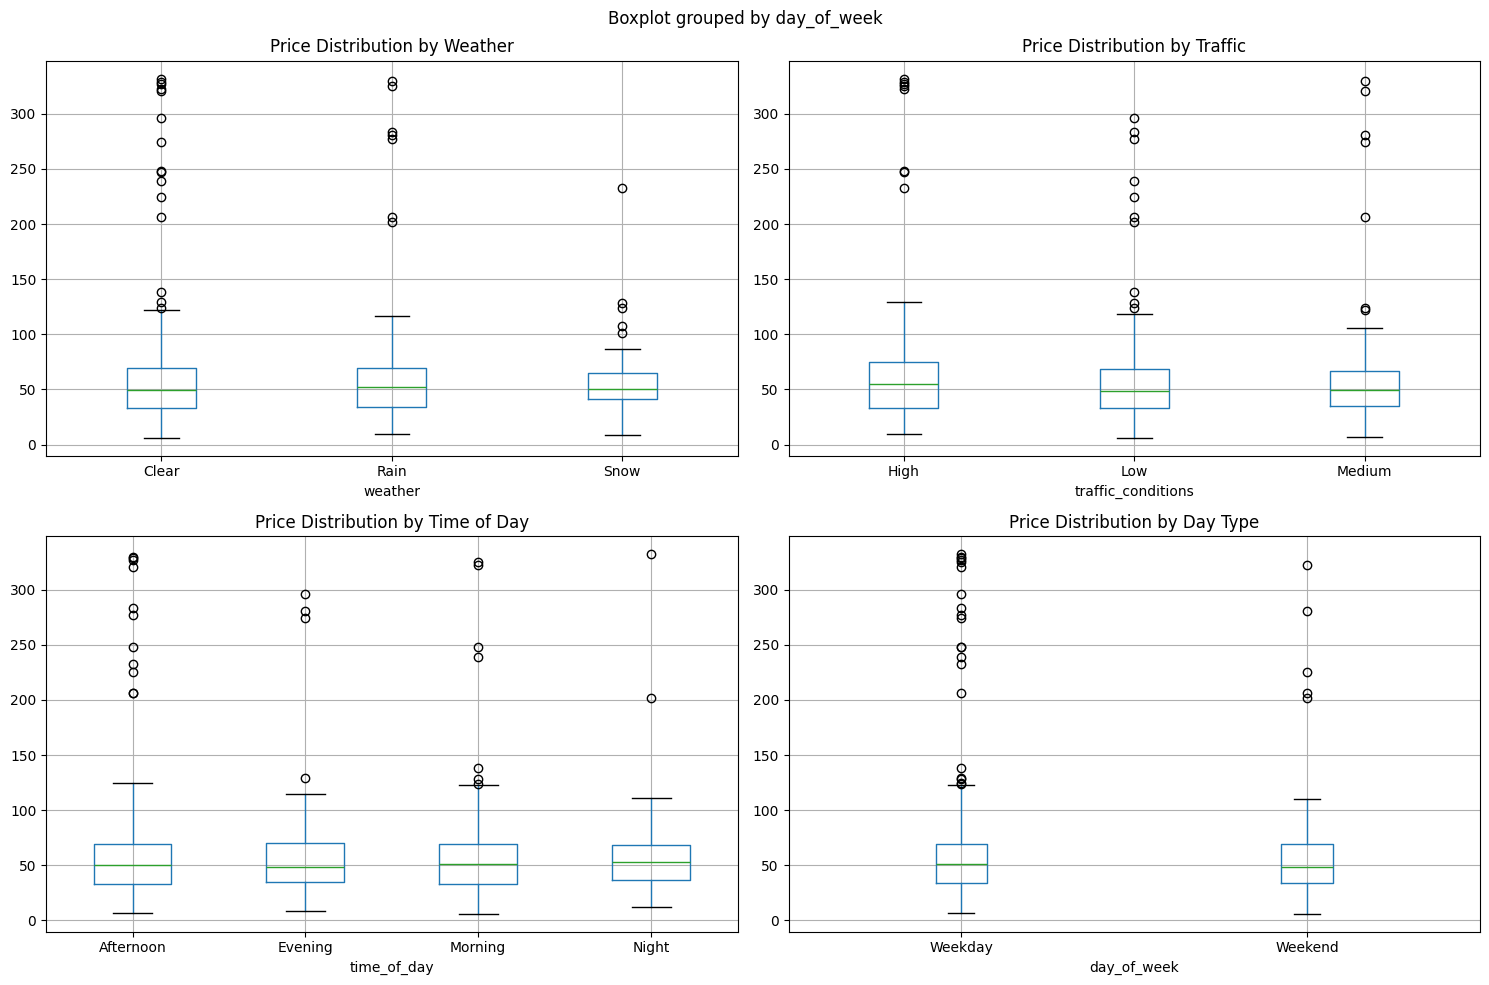

Feature correlations with trip_price:
trip_price            1.000000
traffic_multiplier    0.083769
condition_score       0.082635
high_impact_trip      0.079515
weather_impact        0.030786
is_peak_hours        -0.016532
Name: trip_price, dtype: float64


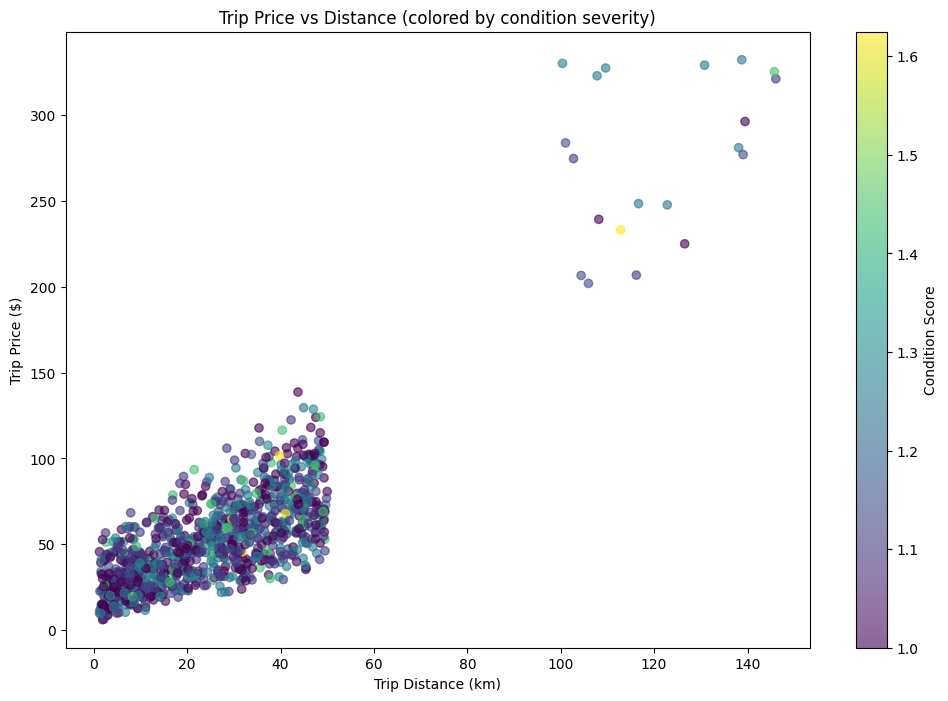

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

clean_csv_path = Path("../src/taxipred/data/taxi_trip_pricing_clean.csv")

# Load the cleaned data with engineered features
df_clean = pd.read_csv(clean_csv_path)

# 1. Price vs conditions scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Weather impact
df_clean.boxplot(column='trip_price', by='weather', ax=axes[0,0])
axes[0,0].set_title('Price Distribution by Weather')

# Traffic impact  
df_clean.boxplot(column='trip_price', by='traffic_conditions', ax=axes[0,1])
axes[0,1].set_title('Price Distribution by Traffic')

# Time of day impact
df_clean.boxplot(column='trip_price', by='time_of_day', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Time of Day')

# Weekend vs weekday
df_clean.boxplot(column='trip_price', by='day_of_week', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Day Type')

plt.tight_layout()
plt.show()

# 2. Check correlation between engineered features and price
correlations = df_clean[['trip_price', 'weather_impact', 'traffic_multiplier', 
                        'condition_score', 'is_peak_hours', 'high_impact_trip']].corr()['trip_price'].sort_values(ascending=False)
print("Feature correlations with trip_price:")
print(correlations)

# 3. Distance vs price colored by conditions
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['trip_distance_km'], df_clean['trip_price'], 
                    c=df_clean['condition_score'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Condition Score')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price ($)')
plt.title('Trip Price vs Distance (colored by condition severity)')
plt.show()